In [1]:
import pandas as pd
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s

In [2]:
tb=pd.read_excel('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Python/Categorical.xlsx')

In [3]:
tb

,servicecall,month_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'simple linear reg')

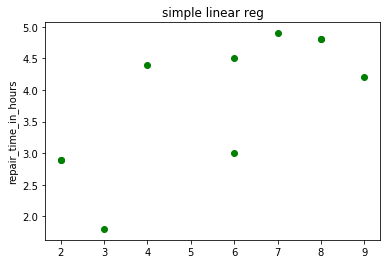

In [5]:
plt.scatter(tb['month_since_last_service'],tb['repair_time_in_hours'],color="green")
plt.ylabel('repair_time_in_hours')
plt.title('simple linear reg')

In [6]:
from statsmodels.formula.api import ols
reg=ols(formula="repair_time_in_hours ~ month_since_last_service",data=tb)
fit1=reg.fit()
print(fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Sun, 07 Jun 2020   Prob (F-statistic):             0.0163
Time:                          00:02:06   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [7]:
influence=fit1.get_influence()
resid_student=influence.resid_studentized_external

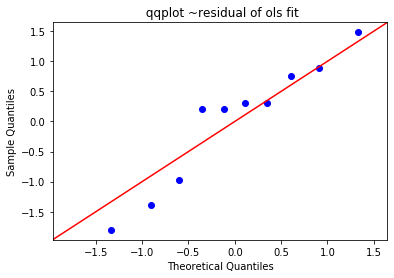

In [9]:
res=fit1.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title(' qqplot ~residual of ols fit')
plt.show()

In [10]:
just_dummies=pd.get_dummies(tb['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [11]:
step_1=pd.concat([tb,just_dummies],axis=1)
step_1

,servicecall,month_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0
5,6,7,electrical,4.9,1,0
6,7,9,mechanical,4.2,0,1
7,8,8,mechanical,4.8,0,1
8,9,4,electrical,4.4,1,0
9,10,6,electrical,4.5,1,0


In [12]:
step_1.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
step_1

,servicecall,month_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [13]:
result=sm.OLS(step_1['repair_time_in_hours'],s.add_constant(step_1[['month_since_last_service','electrical']])).fit()

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [ ]:
print(result.summary())